# Exploratory Data Analysis

In [27]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math

In [3]:
"""
Read in the initial cohort
"""
initial_cohort = pd.read_csv("../data/initial_cohort_final.csv")

In [5]:
"""
Columns names and checking for NA values
"""
initial_cohort.isna().sum()

Unnamed: 0.2                0
Unnamed: 0                  0
subject_id                  0
hadm_id                     0
stay_id                     0
n_stays                     0
avg_los                     0
gender                      0
anchor_age                  0
admission_type              0
suspected_infection      1572
weight                  12775
height                 155427
heart_rate_mean           163
resp_rate_mean            265
temperature_mean        55901
mbp_mean                  391
sbp_mean                 2360
dbp_mean                 2360
spo2_mean                 200
Unnamed: 0.1                0
albumin_min            168976
albumin_max            168976
bun_min                  1325
bun_max                  1325
calcium_min             16854
calcium_max             16854
creatinine_min           1349
creatinine_max           1349
glucose_min              2933
glucose_max              2933
bicarbonate_min          1825
bicarbonate_max          1825
potassium_

In [6]:
"""
Descriptive statistics
"""
initial_cohort.describe(include="all")

,Unnamed: 0.2,Unnamed: 0,subject_id,hadm_id,stay_id,n_stays,avg_los,gender,anchor_age,admission_type,...,po2_min,po2_max,pao2fio2ratio_min,pao2fio2ratio_max,gcs,sofa,charlson,ventilation_status,urineoutput,vaso_rate
count,321317.00000,321317.000000,3.213170e+05,3.213170e+05,3.213170e+05,321317.000000,321317.000000,321317,321317.000000,321317,...,279961.000000,279961.000000,235858.000000,235858.000000,320704.000000,321317.000000,321317.000000,305357,310289.000000,160458.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,EW EMER.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SupplementalOxygen,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197500,NaN,136722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135719,NaN,NaN
mean,160658.00000,22220.355808,1.477356e+07,2.513722e+07,3.488207e+07,1.784272,11.950526,NaN,56.412533,NaN,...,70.963834,254.967817,148.830517,319.508463,10.482133,8.882238,5.454333,NaN,1730.545161,2.291594
std,92756.37256,10620.792255,2.963229e+06,2.846122e+06,2.890546e+06,1.277098,11.720023,NaN,14.486126,NaN,...,44.117805,151.352600,95.200412,170.524283,4.310523,4.630846,2.667516,NaN,1383.773149,3.769864
min,0.00000,0.000000,1.000235e+07,2.000136e+07,3.000147e+07,1.000000,3.300185,NaN,18.000000,NaN,...,4.000000,14.000000,5.714286,29.000000,3.000000,0.000000,0.000000,NaN,0.000000,0.060000
25%,80329.00000,12676.000000,1.204384e+07,2.293473e+07,3.240427e+07,1.000000,4.734034,NaN,48.000000,NaN,...,39.000000,117.000000,75.000000,215.000000,7.000000,5.000000,4.000000,NaN,770.000000,1.201697
50%,160658.00000,24172.000000,1.460799e+07,2.520105e+07,3.481464e+07,1.000000,7.948472,NaN,58.000000,NaN,...,63.000000,231.000000,135.000000,292.000000,12.000000,9.000000,5.000000,NaN,1475.000000,2.400000
75%,240987.00000,31109.000000,1.727769e+07,2.746945e+07,3.734237e+07,2.000000,13.649931,NaN,67.000000,NaN,...,90.000000,379.000000,200.000000,385.000000,14.000000,12.000000,7.000000,NaN,2335.000000,2.406443


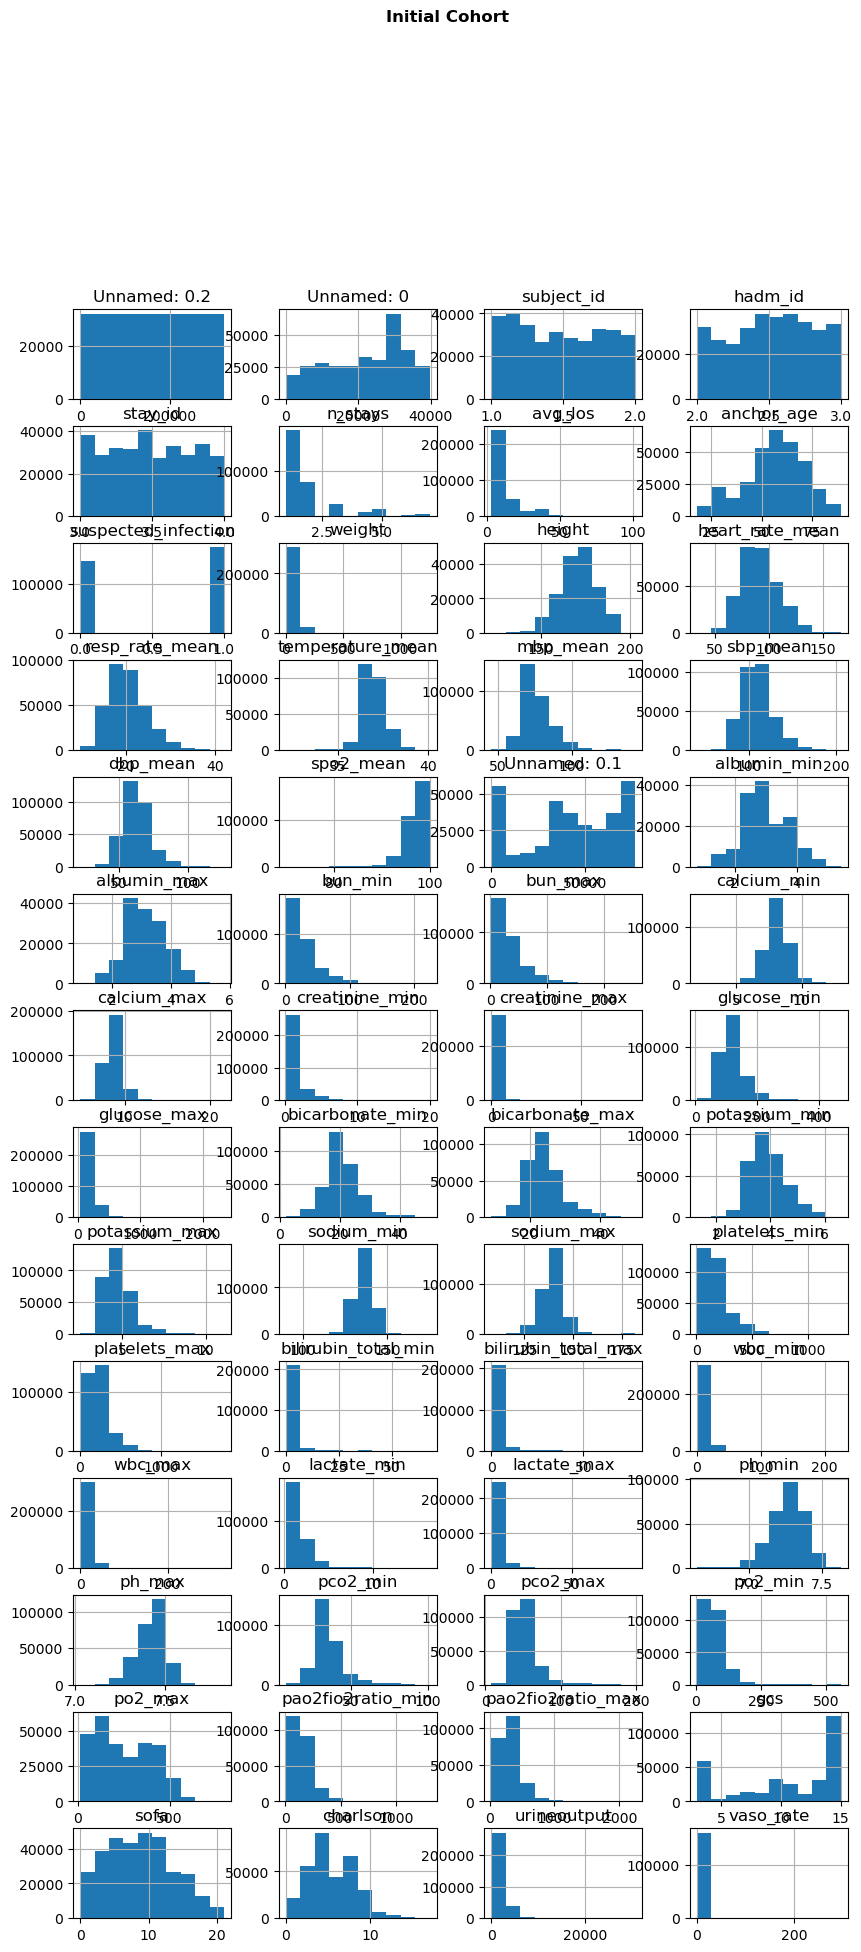

In [39]:
def plot_df_histogram(df, title:str, figsize:tuple=(10,4), **kwargs):
    """
    Plots a histogram from the dataframe
    
    Args:
        df (DataFrame)
        title (str): Title for the plot
        figsize (tuple): Size of the figure to pass to pyplot.figure
    """
    df.hist(figsize=figsize, **kwargs)
    plt.suptitle(title, fontweight="semibold")
    plt.show()

plot_df_histogram(
    initial_cohort,
    title="Initial Cohort",
    figsize=(10, 30),
    layout=(20,4)
)

Column gender is not numeric
Column admission_type is not numeric
Column ventilation_status is not numeric


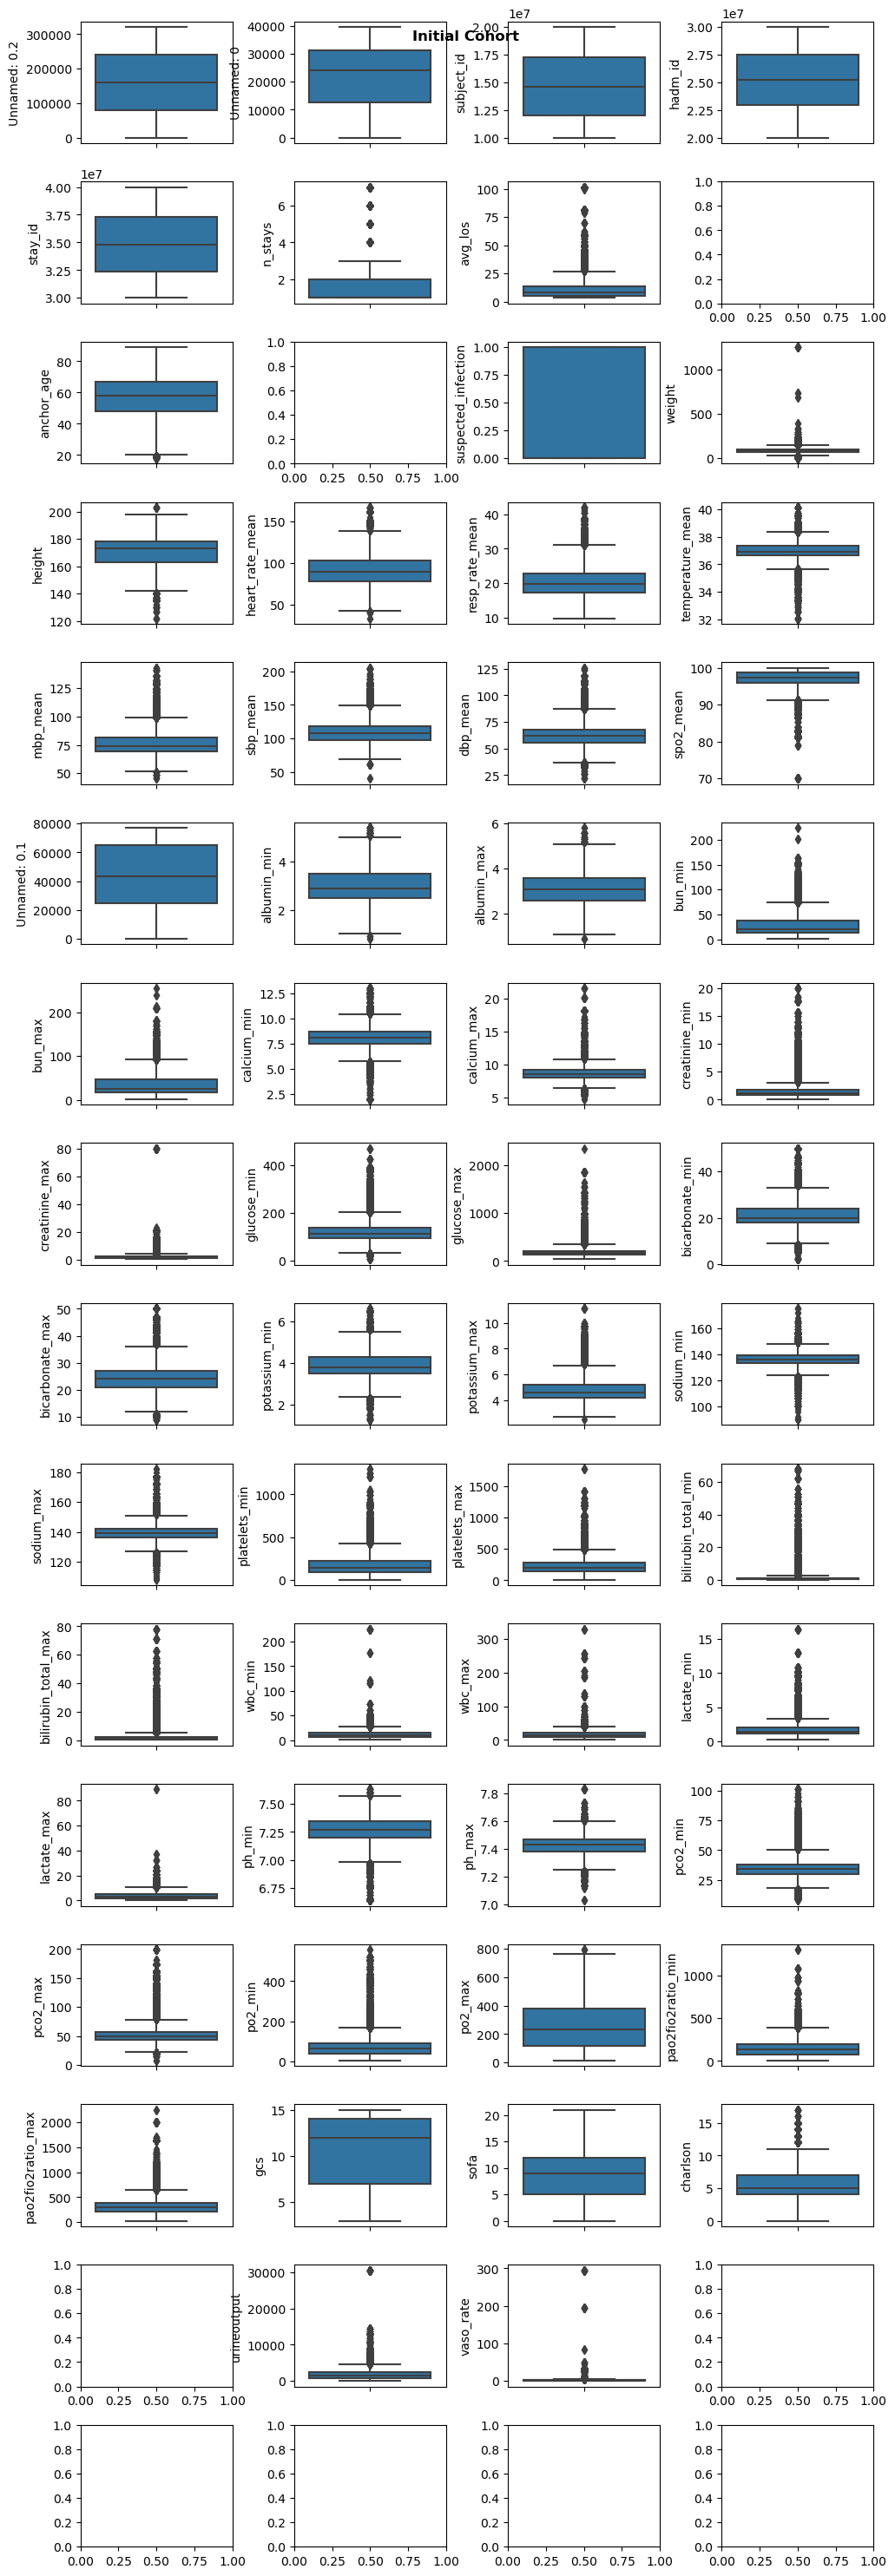

In [37]:
def plot_cohort_statistics(df, title:str, layout=(1, 4), figsize=(10,10)):
    """
    Use a boxplot to visualise the numerical features
    
    Args:
        df (DataFrame)
        title (str): Title for the plot
    """
    row, col = layout
    width, height = figsize
    fig, axs = plt.subplots(row, col)
    fig.set_size_inches(width, height)
    fig.suptitle(title, fontweight="semibold")
    fig.tight_layout()
    
    df_plt = df.copy()

    for i, column in enumerate(df_plt):
        r = math.floor(i / col)
        c = i % col
        try:
            sns.boxplot(y=df_plt[column], ax=axs[r][c])
        except:
            print(f"Column {column} is not numeric")
            continue
    
    plt.show()

plot_cohort_statistics(
    initial_cohort,
    title="Initial Cohort",
    figsize=(10, 30),
    layout=(16,4)
)